<a href="https://colab.research.google.com/github/kiitaamuuraa/Asobiba/blob/main/nn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# MNIST data setup

from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH
PATH.mkdir(parents=True, exist_ok=True)

In [37]:
URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

In [38]:
if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [39]:
print(PATH / FILENAME)

data/mnist.pkl.gz


In [43]:
Path("aaa")/"bbb"

PosixPath('aaa/bbb')

In [46]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding= 'latin-1')

In [63]:
x_train[0].shape, y_train[0].shape, x_valid[0].shape, y_valid[0].shape, len(x_train), len(x_valid)

((784,), (), (784,), (), 50000, 10000)

In [62]:
for i in range(5):
    print("train :", y_train[i], "valid :",y_valid[i])

train : 5 valid : 3
train : 0 valid : 8
train : 4 valid : 6
train : 1 valid : 9
train : 9 valid : 6


In [61]:
import collections

collections.Counter(y_train), collections.Counter(y_valid)

(Counter({0: 4932,
          1: 5678,
          2: 4968,
          3: 5101,
          4: 4859,
          5: 4506,
          6: 4951,
          7: 5175,
          8: 4842,
          9: 4988}),
 Counter({0: 991,
          1: 1064,
          2: 990,
          3: 1030,
          4: 983,
          5: 915,
          6: 967,
          7: 1090,
          8: 1009,
          9: 961}))

In [47]:
from matplotlib import pyplot
import numpy as np

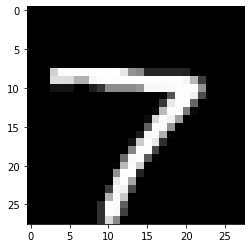

In [71]:
import random
pyplot.imshow(x_train[random.randint(0, len(x_train))].reshape((28, 28)), cmap="gray")

In [72]:
import torch

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [78]:
# Neural net from scratch (no torch.nn)
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [96]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

In [109]:
x = np.random.random((3, 10, 2))

In [110]:
x

array([[[0.61999871, 0.39315117],
        [0.48447383, 0.07876068],
        [0.79384069, 0.55629842],
        [0.46721961, 0.84466117],
        [0.34645565, 0.70454192],
        [0.75525616, 0.8623781 ],
        [0.49896878, 0.70062083],
        [0.30753318, 0.23614878],
        [0.85999991, 0.52545569],
        [0.76020759, 0.00771405]],

       [[0.0224088 , 0.13084131],
        [0.82321125, 0.0839759 ],
        [0.12215662, 0.12023145],
        [0.53389313, 0.27260574],
        [0.01242354, 0.01284786],
        [0.69809554, 0.70719651],
        [0.98543974, 0.21994602],
        [0.06810236, 0.09692676],
        [0.80405229, 0.81244345],
        [0.66023099, 0.76472654]],

       [[0.27085376, 0.88108128],
        [0.80205326, 0.83025342],
        [0.86256449, 0.97249086],
        [0.50405068, 0.49792101],
        [0.89116026, 0.29639506],
        [0.03502777, 0.11893617],
        [0.09705081, 0.82312269],
        [0.8687833 , 0.96928069],
        [0.19601659, 0.51728734],
        [0

In [111]:
x = torch.tensor(x)

In [112]:
x.exp()

tensor([[[1.8589, 1.4816],
         [1.6233, 1.0819],
         [2.2119, 1.7442],
         [1.5956, 2.3272],
         [1.4140, 2.0229],
         [2.1282, 2.3688],
         [1.6470, 2.0150],
         [1.3601, 1.2664],
         [2.3632, 1.6912],
         [2.1387, 1.0077]],

        [[1.0227, 1.1398],
         [2.2778, 1.0876],
         [1.1299, 1.1278],
         [1.7056, 1.3134],
         [1.0125, 1.0129],
         [2.0099, 2.0283],
         [2.6790, 1.2460],
         [1.0705, 1.1018],
         [2.2346, 2.2534],
         [1.9352, 2.1484]],

        [[1.3111, 2.4135],
         [2.2301, 2.2939],
         [2.3692, 2.6445],
         [1.6554, 1.6453],
         [2.4380, 1.3450],
         [1.0356, 1.1263],
         [1.1019, 2.2776],
         [2.3840, 2.6360],
         [1.2165, 1.6775],
         [1.7884, 1.0205]]], dtype=torch.float64)

In [115]:
x.exp().sum(-1)

tensor([[3.3406, 2.7053, 3.9561, 3.9227, 3.4370, 4.4969, 3.6620, 2.6264, 4.0544,
         3.1465],
        [2.1624, 3.3654, 2.2577, 3.0189, 2.0254, 4.0382, 3.9250, 2.1723, 4.4880,
         4.0836],
        [3.7246, 4.5240, 5.0138, 3.3007, 3.7830, 2.1619, 3.3795, 5.0201, 2.8940,
         2.8089]], dtype=torch.float64)

In [116]:
x.exp().sum()

tensor(103.4954, dtype=torch.float64)

In [121]:
x.exp().sum(-1).log().unsqueeze(-1)

tensor([[[1.2061],
         [0.9952],
         [1.3753],
         [1.3668],
         [1.2346],
         [1.5034],
         [1.2980],
         [0.9656],
         [1.3998],
         [1.1463]],

        [[0.7712],
         [1.2135],
         [0.8143],
         [1.1049],
         [0.7058],
         [1.3958],
         [1.3674],
         [0.7758],
         [1.5014],
         [1.4070]],

        [[1.3150],
         [1.5094],
         [1.6122],
         [1.1941],
         [1.3305],
         [0.7710],
         [1.2177],
         [1.6134],
         [1.0626],
         [1.0328]]], dtype=torch.float64)

In [123]:
x.exp().sum(-1).log()

tensor([[1.2061, 0.9952, 1.3753, 1.3668, 1.2346, 1.5034, 1.2980, 0.9656, 1.3998,
         1.1463],
        [0.7712, 1.2135, 0.8143, 1.1049, 0.7058, 1.3958, 1.3674, 0.7758, 1.5014,
         1.4070],
        [1.3150, 1.5094, 1.6122, 1.1941, 1.3305, 0.7710, 1.2177, 1.6134, 1.0626,
         1.0328]], dtype=torch.float64)

In [124]:
def model(xb):
    return log_softmax(xb @ weights + bias)

In [125]:
bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
preds = model(xb)  # predictions
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.7920, -1.8481, -2.2636, -2.3227, -2.0658, -2.5632, -2.1233, -2.4534,
        -2.3312, -2.6228], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [126]:
xb.shape

torch.Size([64, 784])

In [130]:
(xb @ weights).shape, bias.shape

(torch.Size([64, 10]), torch.Size([10]))

In [132]:
(xb @ weights + bias).shape

torch.Size([64, 10])

In [133]:
bias

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [136]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [139]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3957, grad_fn=<NegBackward>)


In [140]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [141]:
print(accuracy(preds, yb))

tensor(0.1094)


In [143]:
 torch.argmax(preds, dim=1)

tensor([1, 1, 1, 1, 8, 4, 4, 1, 4, 9, 4, 9, 1, 9, 4, 1, 9, 7, 1, 6, 8, 1, 9, 1,
        9, 9, 1, 9, 5, 9, 1, 5, 1, 9, 9, 9, 1, 9, 9, 9, 4, 2, 1, 0, 1, 1, 1, 9,
        9, 2, 5, 9, 5, 1, 4, 9, 8, 9, 1, 1, 9, 1, 9, 9])

In [144]:
yb

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])

In [146]:
ans = (yb== torch.argmax(preds, dim=1))

AttributeError: ignored

In [155]:
collections.Counter(ans.tolist())

Counter({False: 57, True: 7})

In [156]:
collections.Counter(yb.tolist())

Counter({0: 7, 1: 8, 2: 4, 3: 8, 4: 8, 5: 4, 6: 6, 7: 5, 8: 5, 9: 9})

In [153]:
collections.Counter(torch.argmax(preds, dim=1).tolist())

Counter({0: 1, 1: 22, 2: 2, 4: 7, 5: 4, 6: 1, 7: 1, 8: 3, 9: 23})

In [154]:
len(yb)

64